# A brief on different Clustering Algorithms :

* **Clustering can be mainly divided into 3 sub categories :**


* **a) Partition-based clustering: E.g. k-means, k-median**

* **b) Hierarchical clustering: E.g. Agglomerative, Divisive**

* **c) Density-based clustering: E.g. DBSCAN**

    * **`Partition-based and hierarchical clustering techniques are highly efficient with normal shaped clusters. However, when it comes to arbitrary shaped clusters or detecting outliers, density-based techniques are more efficient.`**





* **List of Clustering Algorithms discussed :**

    * **Affinity Propagation**
    * **Agglomerative Clustering**
    * **BIRCH**
    * **DBSCAN**
    * **K-Means**
    * **Mini-Batch K-Means**
    * **Mean Shift**
    * **OPTICS**
    * **Spectral Clustering**
    * **Mixture of Gaussians**

## 1.0 Creating a synthetic dataset wiht sklearn's make classification method : 

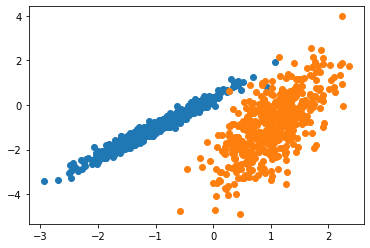

In [1]:
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

### 1.1 Affinity Propogation Algorithm : 

* **Affinity propagation (AP) is a graph based clustering algorithm similar to k Means or K medoids, which does not require the estimation of the number of clusters before running the algorithm. 
Affinity propagation finds “exemplars” i.e. members of the input set that are representative of clusters.**

* **Reference : https://towardsdatascience.com/math-and-intuition-behind-affinity-propagation-4ec5feae5b23**

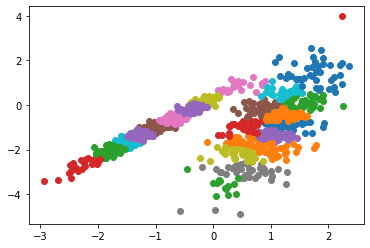

In [2]:
# affinity propagation clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = AffinityPropagation(damping=0.9)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

### 1.2 Agglomerative Clustering : (Hierarchical clustering)

* **Reference : Hierarchical clustering**

* **Hierarchical clustering means creating a tree of clusters by iteratively grouping or separating data points.**

* **Hierarchical clustering is useful and gives better results if the underlying data has some sort of hierarchy.**

* **There are two types of hierarchical clustering:**
    * **a)Agglomerative clustering (bottom up)**
    
    * **b)Divisive clustering (top down)**


* **Agglomerative clustering is kind of a bottom-up approach. Each data point is assumed to be a separate cluster at first. Then the similar clusters are iteratively combined. Let’s go over an example to explain the concept clearly.**

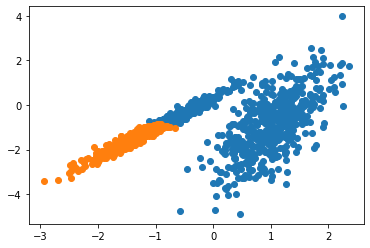

In [3]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = AgglomerativeClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

### 1.3 BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)

* **(BIRCH) is a clustering algorithm that can cluster large datasets by first generating a small and compact summary of the the large dataset that retains as much information as possible. This smaller summary is then clustered instead of clustering the larger dataset.**

* **Reference : https://www.geeksforgeeks.org/ml-birch-clustering/**

* **`BIRCH is often used to complement other clustering algorithms by creating a summary of the dataset that the other clustering algorithm can now use`. However, BIRCH has one `major drawback` – it can only process metric attributes. A metric attribute is any attribute whose values can be represented in Euclidean space i.e., `no categorical attributes should be present`.**

* **Two important terms: Clustering Feature (CF) and CF – Tree**

* **`Clustering Feature (CF)`:**
    * **BIRCH summarizes large datasets into smaller, dense regions called Clustering Feature (CF) entries. Formally, a Clustering Feature entry is defined as an ordered triple, (N, LS, SS) where ‘N’ is the number of data points in the cluster, ‘LS’ is the linear sum of the data points and ‘SS’ is the squared sum of the data points in the cluster. It is possible for a CF entry to be composed of other CF entries**

* **`CF Tree`:**
    * **The CF tree is the actual compact representation that we have been speaking of so far. A CF tree is a tree where each leaf node contains a sub-cluster. Every entry in a CF tree contains a pointer to a child node and a CF entry made up of the sum of CF entries in the child nodes. There is a maximum number of entries in each leaf node. This maximum number is called the `threshold`. **

* **Parameters of BIRCH Algorithm :**
    * **`threshold` :  threshold is the maximum number of data points a sub-cluster in the leaf node of the CF tree can hold.**

    * **`branching_factor` : This parameter specifies the maximum number of CF sub-clusters in each node (internal node).**
    
    * **`n_clusters` : The number of clusters to be returned after the entire BIRCH algorithm is complete i.e., number of clusters after the final clustering step. If set to None, the final clustering step is not performed and intermediate clusters are returned.**

    

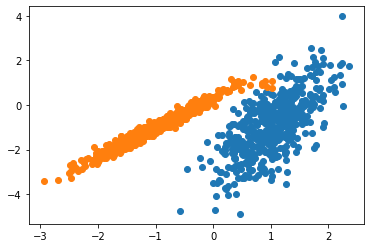

In [5]:
# birch clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = Birch(threshold=0.01, n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

### 1.4 DBSCAN (Density-Based Spatial Clustering of Applications with Noise) :

* **`Note: It is important to normalize values because it makes it easier to find an appropriate distance for radius of neighborhood (eps).`**

* **Reference : https://towardsdatascience.com/dbscan-clustering-explained-97556a2ad556**

* **It is able to find arbitrary shaped clusters and clusters with noise (i.e. outliers).The main idea behind DBSCAN is that a point belongs to a cluster if it is close to many points from that cluster.**

    * **There are two key parameters of DBSCAN: `eps` and `minPts`**
        * **`eps`: The distance that specifies the neighborhoods. Two points are considered to be neighbors if the distance between them are less than or equal to eps.**

        * **`minPts`: Minimum number of data points to define a cluster.**

* **Based on these two parameters, `points are classified` as `core point`, `border point`, or `outlier`:**

    * **`Core point`: A point is a core point if there are at least minPts number of points (including the point itself) in its surrounding area with radius eps.**

    * **`Border point`: A point is a border point if it is reachable from a core point and there are less than minPts number of points within its surrounding area.**
    
    * **`Outlier`: A point is an outlier if it is not a core point and not reachable from any core points.**

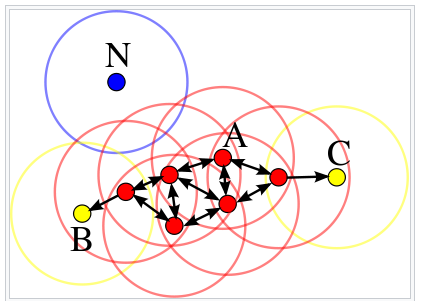

In [13]:
from IPython.display import Image 
Image(filename = "picture.png", width = 600, height = 300)

* **`Red points are core points` because there are at least 4 points within their surrounding area with radius eps.**

* **`The yellow points are border points` because they are reachable from a core point and have less than 4 points within their neighborhood. Reachable means being in the surrounding area of a core point.**

* **The points B and C have two points (including the point itself) within their neigborhood (i.e. the surrounding area with a radius of eps). **

* **Finally `N is an outlier` because it is not a core point and cannot be reached from a core point.**

* **Pros:**
    * **Does not require to specify number of clusters beforehand.**

    * **Performs well with arbitrary shapes clusters.**

    * **DBSCAN is robust to outliers and able to detect the outliers.**
* **Cons:**
    * **In some cases, determining an appropriate distance of neighborhood (eps) is not easy and it requires domain knowledge.**
    
    * **If clusters are very different in terms of in-cluster densities, DBSCAN is not well suited to define clusters. The characteristics of clusters are defined by the combination of eps-minPts parameters. Since we pass in one eps-minPts combination to the algorithm, it cannot generalize well to clusters with much different densities.**

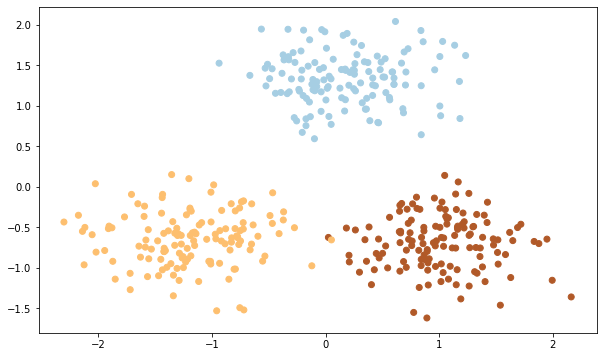

In [17]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#Determine centroids
centers = [[0.5, 2], [-1, -1], [1.5, -1]]
#Create dataset
X, y = make_blobs(n_samples=400, centers=centers, 
                  cluster_std=0.5, random_state=0)
#Normalize the values
X = StandardScaler().fit_transform(X)

plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='Paired');

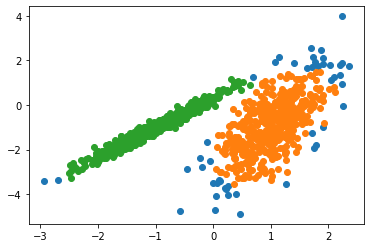

In [18]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

### 1.5 K-Means Clustering : 

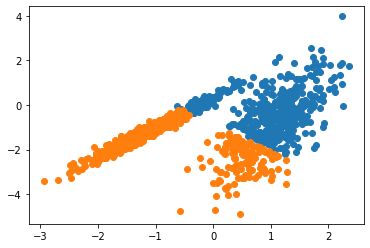

In [19]:
# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = KMeans(n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

### 1.6 Mini-Batch K-Means : 

* **Mini-Batch K-Means is a modified version of k-means that makes updates to the cluster centroids using mini-batches of samples rather than the entire dataset, which can make it faster for large datasets, and perhaps more robust to statistical noise.**

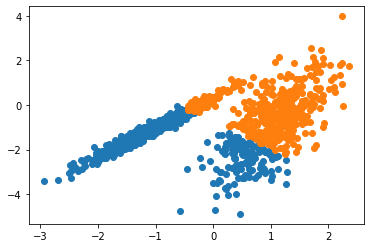

In [20]:
# mini-batch k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MiniBatchKMeans
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = MiniBatchKMeans(n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

### 1.7 Mean Shift : 

* **Reference : https://towardsdatascience.com/machine-learning-algorithms-part-13-mean-shift-clustering-example-in-python-4d6452720b00**


* **Mean Shift is a hierarchical clustering algorithm**

* **As opposed to K-Means, when using Mean Shift, you don’t need to know the number of categories (clusters) beforehand. The downside to Mean Shift is that it is computationally expensive**

* **Mean shift clustering involves finding and adapting centroids based on the density of examples in the feature space.**

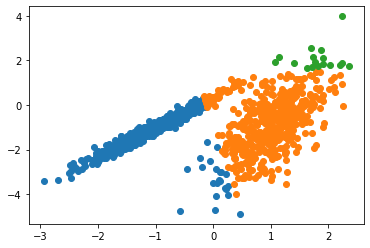

In [21]:
# mean shift clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MeanShift
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = MeanShift()
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

### 1.8 OPTICS (Ordering Points To Identify the Clustering Structure) is a modified version of DBSCAN : 

* **Reference : https://medium.com/@xzz201920/optics-d80b41fd042a**

* **Ordering points to identify the clustering structure (OPTICS) is an algorithm for finding density-based clusters in spatial data. Its basic idea is similar to DBSCAN, but it addresses one of DBSCAN’s major weaknesses: the problem of detecting meaningful clusters in data of varying density**

* **To do so, the points of the database are (linearly) ordered such that spatially closest points become neighbors in the ordering. Additionally, a special distance is stored for each point that represents the density that must be accepted for a cluster so that both points belong to the same cluster. This is represented as a dendrogram.**

* `OPTIC Algorithm  does not produce a clustering of a data set explicitly; but instead creates an augmented ordering of the database representing its density-based clustering structure. This cluster-ordering contains information which is equivalent to the density-based clusterings corresponding to a broad range of parameter settings.`

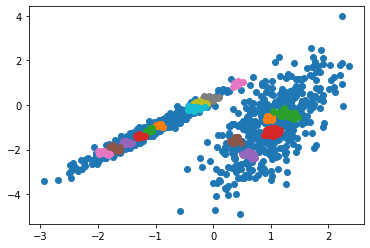

In [22]:
# optics clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import OPTICS
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = OPTICS(eps=0.8, min_samples=10)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

### 1.9 Spectral Clustering : 

* **Reference : https://towardsdatascience.com/spectral-clustering-82d3cff3d3b7**

* **In spectral clustering, the data points are treated as nodes of a graph. Thus, clustering is treated as a graph partitioning problem. The nodes are then mapped to a low-dimensional space that can be easily segregated to form clusters. An important point to note is that no assumption is made about the shape/form of the clusters.**

* **`Here, one uses the top eigenvectors of a matrix derived from the distance between points.`**

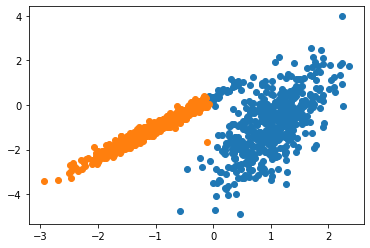

In [23]:
# spectral clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = SpectralClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

### 1.10 Gaussian Mixture Model : 

* **Reference : https://towardsdatascience.com/gaussian-mixture-models-d13a5e915c8e#:~:text=Gaussian%20mixture%20models%20can%20be,same%20way%20as%20k%2Dmeans.&text=The%20second%20difference%20between%20k,the%20latter%20performs%20soft%20classification.**

* **Gaussian mixture models can be used to cluster unlabeled data in much the same way as k-means. There are, however, a couple of advantages to using Gaussian mixture models over k-means.**

* **A Gaussian mixture model summarizes a multivariate probability density function with a mixture of Gaussian probability distributions**

* **Difference with k-means :**
    * **First and foremost, `k-means does not account for variance`. By variance, we are referring to the width of the bell shape curve.**

    * **Gaussian mixture models can handle even very oblong clusters.**

    * **The second `difference between k-means and Gaussian mixture models is that the former performs hard classification whereas the latter performs soft classification`. In other words, k-means tells us what data point belong to which cluster but won’t provide us with the probabilities that a given data point belongs to each of the possible clusters.**




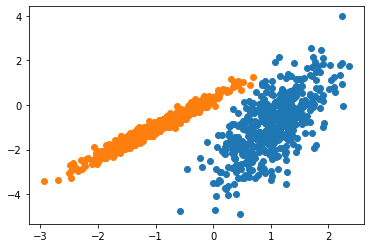

In [24]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = GaussianMixture(n_components=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()